In [1]:
import pandas as pd
import numpy as np

reaction_data = pd.read_csv('02-210-1.csv', sep=',')
reaction_data.head()

,Unnamed: 0,Time (min),Unnamed: 2,Ester fuel,Unnamed: 4,Phenol waste,Unnamed: 6
0,-420,0.000000,1.0,48.000000,0.00,0.000000,--
1,0,7.000000,66091.0,45.119348,4219.59,2.880652,NaN
2,273,11.550000,34603.5,43.928808,3206.95,4.071192,NaN
3,523,15.716667,33556.1,42.716877,4150.14,5.283123,NaN
4,773,19.883333,32715.7,41.509045,5115.90,6.490955,NaN


In [2]:
reaction_data.rename(columns={"Time (min)":"Time", "Ester fuel":"Fuel", "Phenol waste":"Waste", "Ester fuel (old way)":"Fuel_old", "Byproducts (old way)":"Byproduct_old", "Phenol waste (old way)":"Waste_old"}, inplace=True)
reaction_data.head()


,Unnamed: 0,Time,Unnamed: 2,Fuel,Unnamed: 4,Waste,Unnamed: 6
0,-420,0.000000,1.0,48.000000,0.00,0.000000,--
1,0,7.000000,66091.0,45.119348,4219.59,2.880652,NaN
2,273,11.550000,34603.5,43.928808,3206.95,4.071192,NaN
3,523,15.716667,33556.1,42.716877,4150.14,5.283123,NaN
4,773,19.883333,32715.7,41.509045,5115.90,6.490955,NaN


Derivative(fuel, t; k1) = -k1*fuel

Parameter Value        Standard Deviation
k1        6.623899e-03 9.407502e-05
Status message         Desired error not necessarily achieved due to precision loss.
Number of iterations   5
Objective              <symfit.core.objectives.LeastSquares object at 0x7fad440decd0>
Minimizer              <symfit.core.minimizers.BFGS object at 0x7fad440dee50>

Goodness of fit qualifiers:
chi_squared            2.496651574191559
objective_value        1.2483257870957796
r_squared              0.9900645879137479


<IPython.core.display.Javascript object>


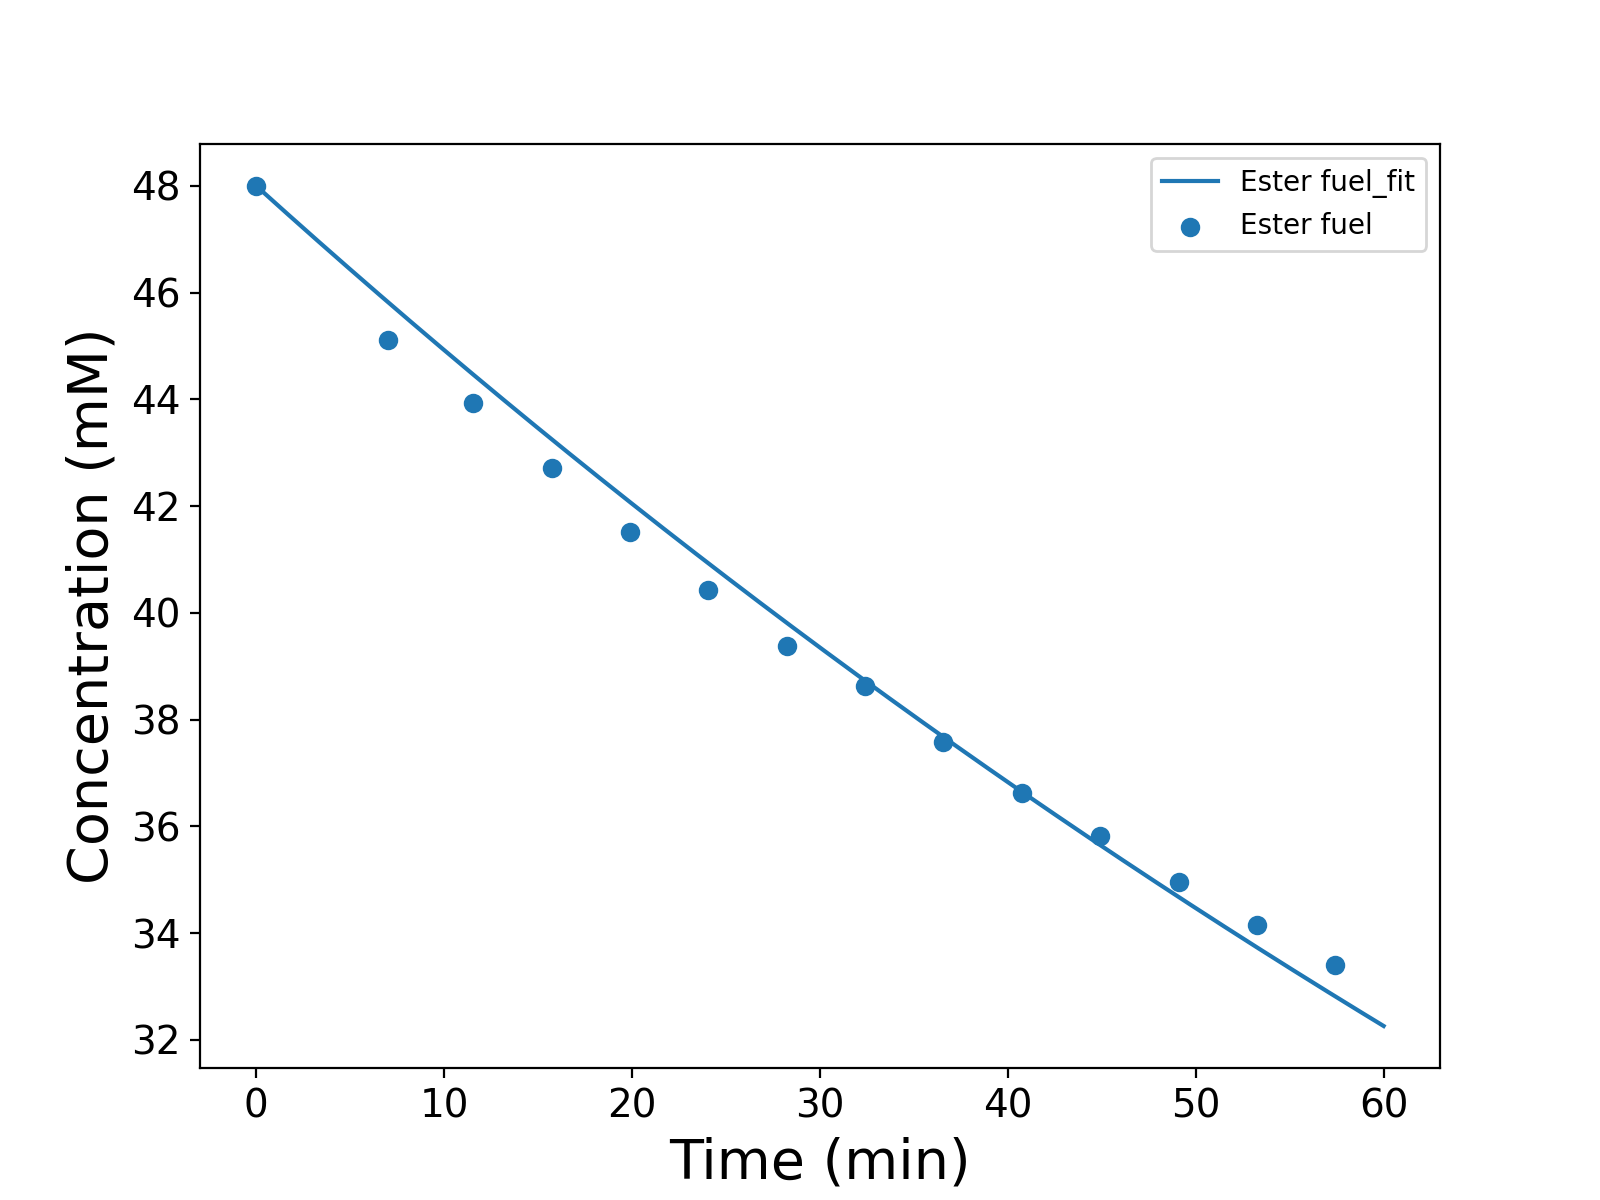

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from symfit import parameters, variables, Fit, D, ODEModel

%matplotlib nbagg

"""
Fitting to SA02-210-1 (10 mM) based on concentration. The concentration was calculated WITHOUT an external standard.
k1 is the pseudo-first order rate constant for the hydrolysis of the ester fuel. 
"""

t, fuel = variables('t, fuel')
k1, k2 = parameters('k1, k2')
k1.value = 0.007

t_data = np.array(reaction_data.Time, dtype=np.float64)
fuel_data = np.array(reaction_data.Fuel, dtype=np.float64)

t0 = 0.0
fuel0 = 48.0

model_dict = {
    D(fuel, t): -k1*fuel
}

ode_model = ODEModel(model_dict, initial={t: t0, fuel: fuel0})
print(ode_model)
fit = Fit(ode_model, t=t_data, fuel=fuel_data)
fit_result = fit.execute()
print(fit_result)

tvec = np.linspace(0.0, 60.0, 10000)
fuel, = ode_model(t=tvec, **fit_result.params)

fig, ax = plt.subplots(1,1, figsize=(8,6))

ax.plot(tvec, fuel, label='Ester fuel_fit')
ax.scatter(t_data, fuel_data, label='Ester fuel')

ax.set_xlabel('Time (min)', fontsize=20, fontweight='normal')
ax.set_ylabel('Concentration (mM)', fontsize=20, fontweight='normal')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.legend(loc='best')
plt.show()

In [4]:
import pandas as pd
import numpy as np

reaction_data = pd.read_csv('02-210-2.csv', sep=',')
reaction_data.head()

,Unnamed: 0,Time (min),Unnamed: 2,Ester fuel,Unnamed: 4,Phenol waste,Unnamed: 6
0,-420,0.000000,1.0,48.000000,0.00,0.000000,--
1,0,7.000000,77986.8,46.365580,2749.09,1.634420,NaN
2,275,11.583333,41657.3,45.510286,2278.93,2.489714,NaN
3,525,15.750000,40772.1,44.663195,3046.10,3.336805,NaN
4,775,19.916667,39804.1,43.838674,3778.35,4.161326,NaN


In [5]:
reaction_data.rename(columns={"Time (min)":"Time", "Ester fuel":"Fuel", "Phenol waste":"Waste", "Ester fuel (old way)":"Fuel_old", "Byproducts (old way)":"Byproduct_old", "Phenol waste (old way)":"Waste_old"}, inplace=True)
reaction_data.head()

,Unnamed: 0,Time,Unnamed: 2,Fuel,Unnamed: 4,Waste,Unnamed: 6
0,-420,0.000000,1.0,48.000000,0.00,0.000000,--
1,0,7.000000,77986.8,46.365580,2749.09,1.634420,NaN
2,275,11.583333,41657.3,45.510286,2278.93,2.489714,NaN
3,525,15.750000,40772.1,44.663195,3046.10,3.336805,NaN
4,775,19.916667,39804.1,43.838674,3778.35,4.161326,NaN


Derivative(fuel, t; k1) = -k1*fuel

Parameter Value        Standard Deviation
k1        4.442101e-03 2.445365e-05
Status message         Desired error not necessarily achieved due to precision loss.
Number of iterations   6
Objective              <symfit.core.objectives.LeastSquares object at 0x7fad442a1a00>
Minimizer              <symfit.core.minimizers.BFGS object at 0x7fad442a1b20>

Goodness of fit qualifiers:
chi_squared            0.20388781336167838
objective_value        0.10194390668083919
r_squared              0.998542268536776


<IPython.core.display.Javascript object>


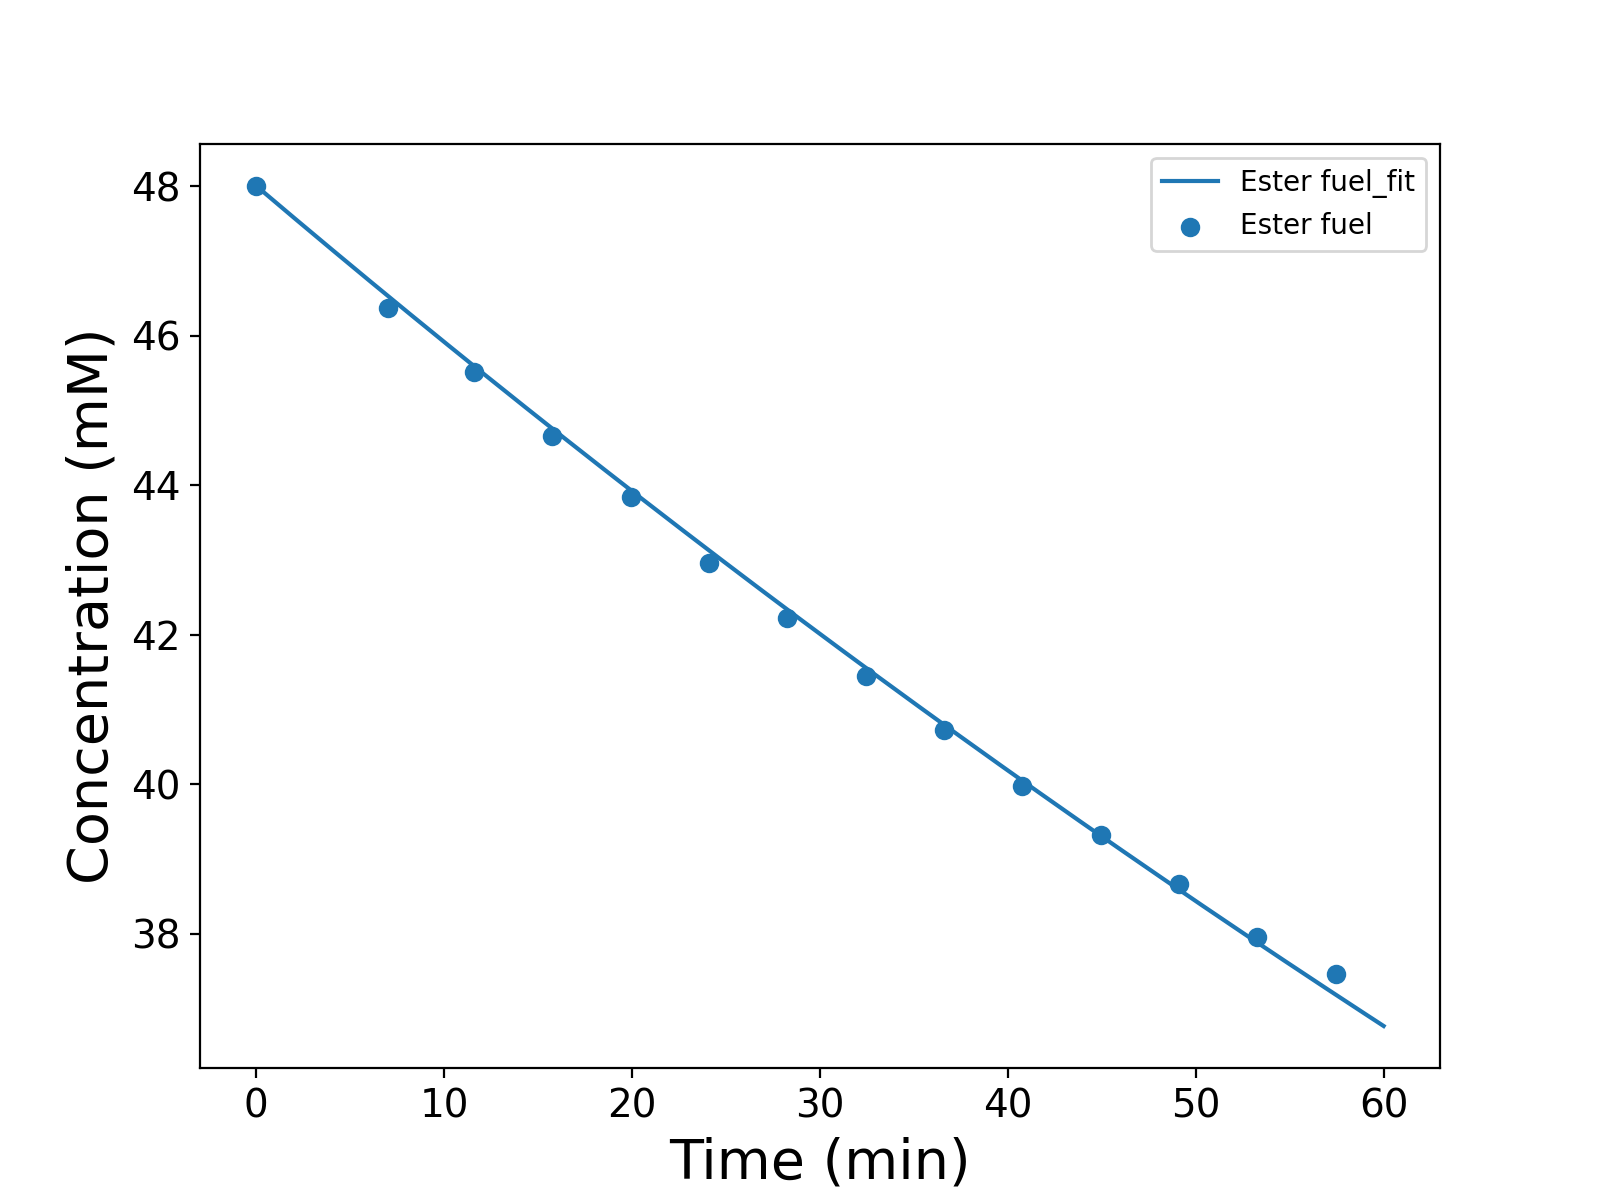

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from symfit import parameters, variables, Fit, D, ODEModel

%matplotlib nbagg

"""
Fitting to SA02-210-2 (6 mM) based on concentration. The concentration was calculated WITHOUT an external standard.
k1 is the pseudo-first order rate constant for the hydrolysis of the ester fuel. 
"""

t, fuel = variables('t, fuel')
k1, k2 = parameters('k1, k2')
k1.value = 0.007

t_data = np.array(reaction_data.Time, dtype=np.float64)
fuel_data = np.array(reaction_data.Fuel, dtype=np.float64)

t0 = 0.0
fuel0 = 48.0

model_dict = {
    D(fuel, t): -k1*fuel
}

ode_model = ODEModel(model_dict, initial={t: t0, fuel: fuel0})
print(ode_model)
fit = Fit(ode_model, t=t_data, fuel=fuel_data)
fit_result = fit.execute()
print(fit_result)

tvec = np.linspace(0.0, 60.0, 10000)
fuel, = ode_model(t=tvec, **fit_result.params)

fig, ax = plt.subplots(1,1, figsize=(8,6))

ax.plot(tvec, fuel, label='Ester fuel_fit')
ax.scatter(t_data, fuel_data, label='Ester fuel')

ax.set_xlabel('Time (min)', fontsize=20, fontweight='normal')
ax.set_ylabel('Concentration (mM)', fontsize=20, fontweight='normal')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.legend(loc='best')
plt.show()

In [7]:
import pandas as pd
import numpy as np

reaction_data = pd.read_csv('02-210-3.csv', sep=',')
reaction_data.head()

,Unnamed: 0,Time (min),Unnamed: 2,Ester fuel,Unnamed: 4,Phenol waste,Unnamed: 6
0,-420,0.000000,1.0,48.000000,0.00,0.000000,--
1,0,7.000000,80515.8,46.952637,1796.05,1.047363,NaN
2,281,11.683333,43484.1,46.580957,1324.70,1.419043,NaN
3,531,15.850000,43054.1,46.154500,1721.53,1.845500,NaN
4,782,20.033333,42654.0,45.751449,2096.32,2.248551,NaN


In [8]:
reaction_data.rename(columns={"Time (min)":"Time", "Ester fuel":"Fuel", "Phenol waste":"Waste", "Ester fuel (old way)":"Fuel_old", "Byproducts (old way)":"Byproduct_old", "Phenol waste (old way)":"Waste_old"}, inplace=True)
reaction_data.head()


,Unnamed: 0,Time,Unnamed: 2,Fuel,Unnamed: 4,Waste,Unnamed: 6
0,-420,0.000000,1.0,48.000000,0.00,0.000000,--
1,0,7.000000,80515.8,46.952637,1796.05,1.047363,NaN
2,281,11.683333,43484.1,46.580957,1324.70,1.419043,NaN
3,531,15.850000,43054.1,46.154500,1721.53,1.845500,NaN
4,782,20.033333,42654.0,45.751449,2096.32,2.248551,NaN


Derivative(fuel, t; k1) = -k1*fuel

Parameter Value        Standard Deviation
k1        2.237942e-03 2.354416e-05
Status message         Desired error not necessarily achieved due to precision loss.
Number of iterations   8
Objective              <symfit.core.objectives.LeastSquares object at 0x7fad442a9f70>
Minimizer              <symfit.core.minimizers.BFGS object at 0x7fad442a9fd0>

Goodness of fit qualifiers:
chi_squared            0.2308716166319645
objective_value        0.11543580831598226
r_squared              0.9939354146219606


<IPython.core.display.Javascript object>


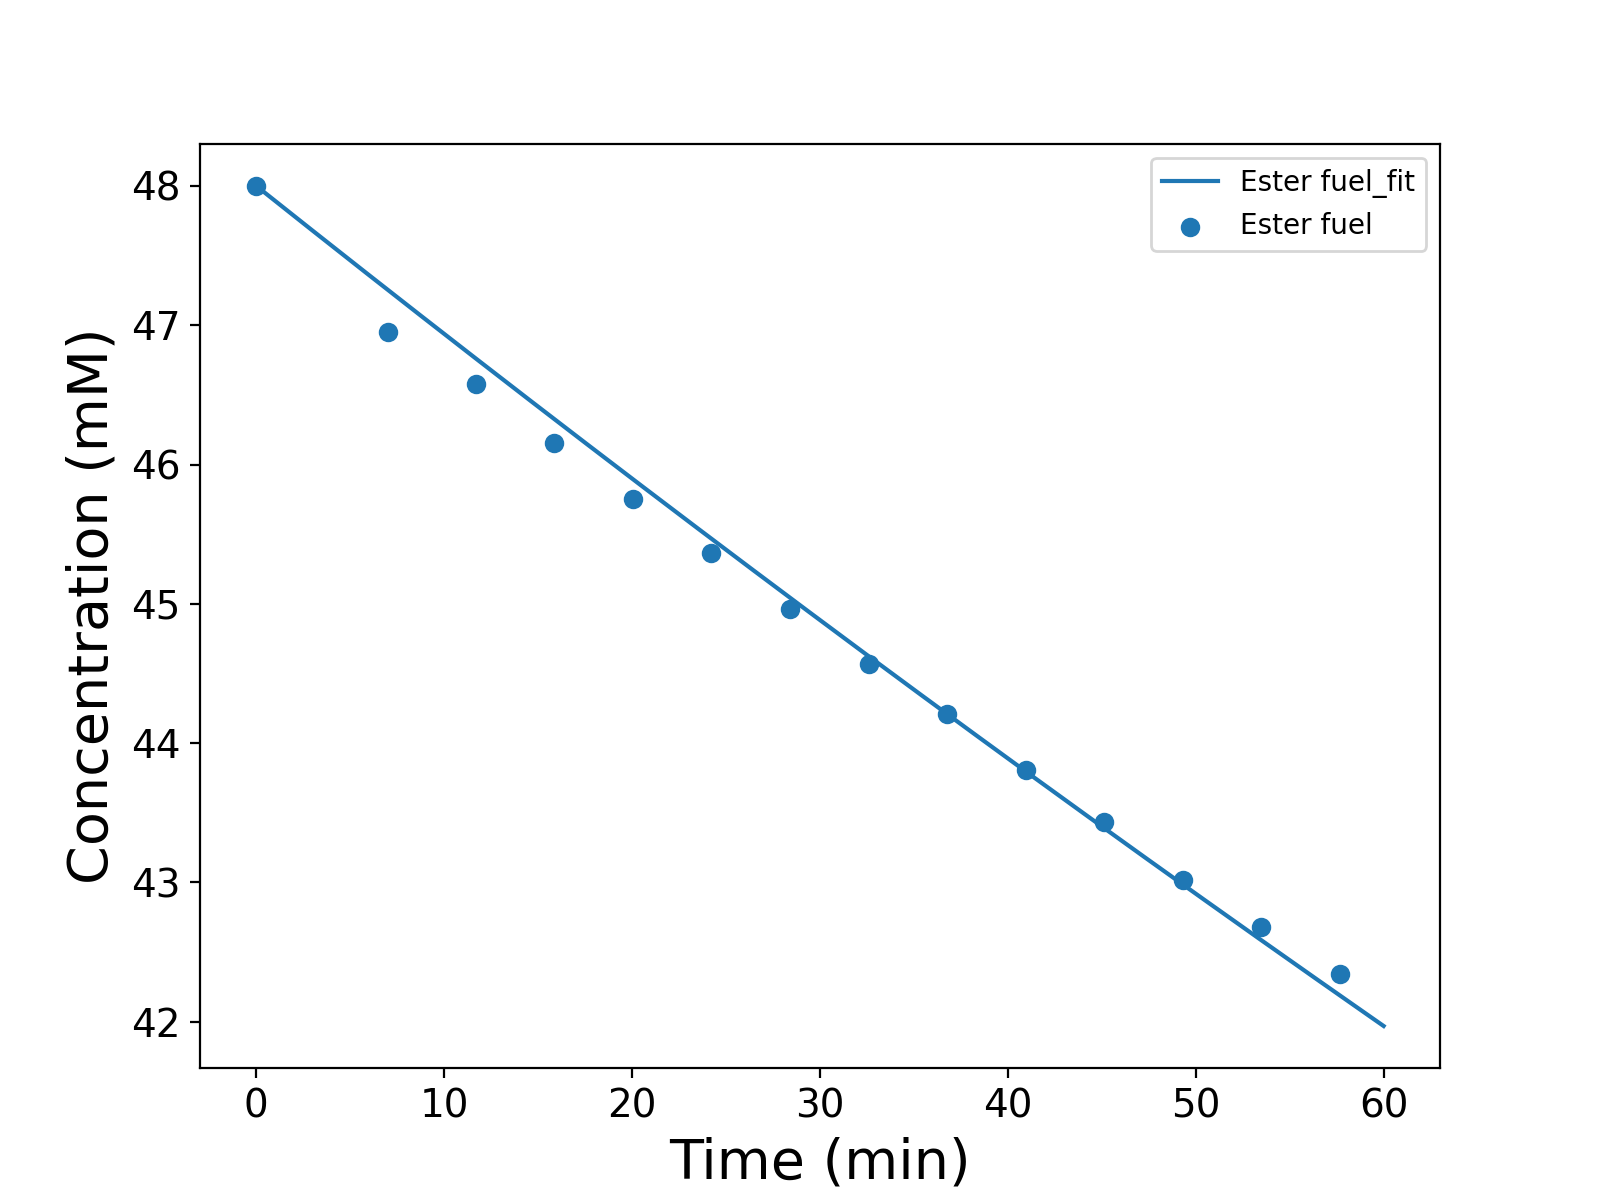

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from symfit import parameters, variables, Fit, D, ODEModel

%matplotlib nbagg

"""
Fitting to SA02-210-3 (2 mM) based on concentration. The concentration was calculated WITHOUT an external standard.
k1 is the pseudo-first order rate constant for the hydrolysis of the ester fuel. 
"""

t, fuel = variables('t, fuel')
k1, k2 = parameters('k1, k2')
k1.value = 0.007

t_data = np.array(reaction_data.Time, dtype=np.float64)
fuel_data = np.array(reaction_data.Fuel, dtype=np.float64)

t0 = 0.0
fuel0 = 48.0

model_dict = {
    D(fuel, t): -k1*fuel
}

ode_model = ODEModel(model_dict, initial={t: t0, fuel: fuel0})
print(ode_model)
fit = Fit(ode_model, t=t_data, fuel=fuel_data)
fit_result = fit.execute()
print(fit_result)

tvec = np.linspace(0.0, 60.0, 10000)
fuel, = ode_model(t=tvec, **fit_result.params)

fig, ax = plt.subplots(1,1, figsize=(8,6))

ax.plot(tvec, fuel, label='Ester fuel_fit')
ax.scatter(t_data, fuel_data, label='Ester fuel')

ax.set_xlabel('Time (min)', fontsize=20, fontweight='normal')
ax.set_ylabel('Concentration (mM)', fontsize=20, fontweight='normal')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.legend(loc='best')
plt.show()

In [1]:
import pandas as pd
import numpy as np

reaction_data = pd.read_csv('02-211-1.csv', sep=',')
reaction_data.head()

,Unnamed: 0,Time (min),Unnamed: 2,Ester fuel,Unnamed: 4,Phenol waste,Unnamed: 6
0,-360,0.000000,1.0,48.000000,0.000,0.000000,--
1,0,6.000000,83542.8,47.183750,1445.240,0.816250,NaN
2,283,10.716667,41543.2,47.004659,879.693,0.995341,NaN
3,534,14.900000,41364.0,46.691928,1158.810,1.308072,NaN
4,784,19.066667,41050.4,46.479496,1342.900,1.520504,NaN


In [2]:
reaction_data.rename(columns={"Time (min)":"Time", "Ester fuel":"Fuel", "Phenol waste":"Waste", "Ester fuel (old way)":"Fuel_old", "Byproducts (old way)":"Byproduct_old", "Phenol waste (old way)":"Waste_old"}, inplace=True)
reaction_data.head()

,Unnamed: 0,Time,Unnamed: 2,Fuel,Unnamed: 4,Waste,Unnamed: 6
0,-360,0.000000,1.0,48.000000,0.000,0.000000,--
1,0,6.000000,83542.8,47.183750,1445.240,0.816250,NaN
2,283,10.716667,41543.2,47.004659,879.693,0.995341,NaN
3,534,14.900000,41364.0,46.691928,1158.810,1.308072,NaN
4,784,19.066667,41050.4,46.479496,1342.900,1.520504,NaN


Derivative(fuel, t; k1) = -k1*fuel

Parameter Value        Standard Deviation
k1        1.458740e-03 3.247305e-05
Status message         Desired error not necessarily achieved due to precision loss.
Number of iterations   6
Objective              <symfit.core.objectives.LeastSquares object at 0x7fd943fe6d00>
Minimizer              <symfit.core.minimizers.BFGS object at 0x7fd943fe6f70>

Goodness of fit qualifiers:
chi_squared            0.44891794694883363
objective_value        0.22445897347441682
r_squared              0.9696074897440877


<IPython.core.display.Javascript object>


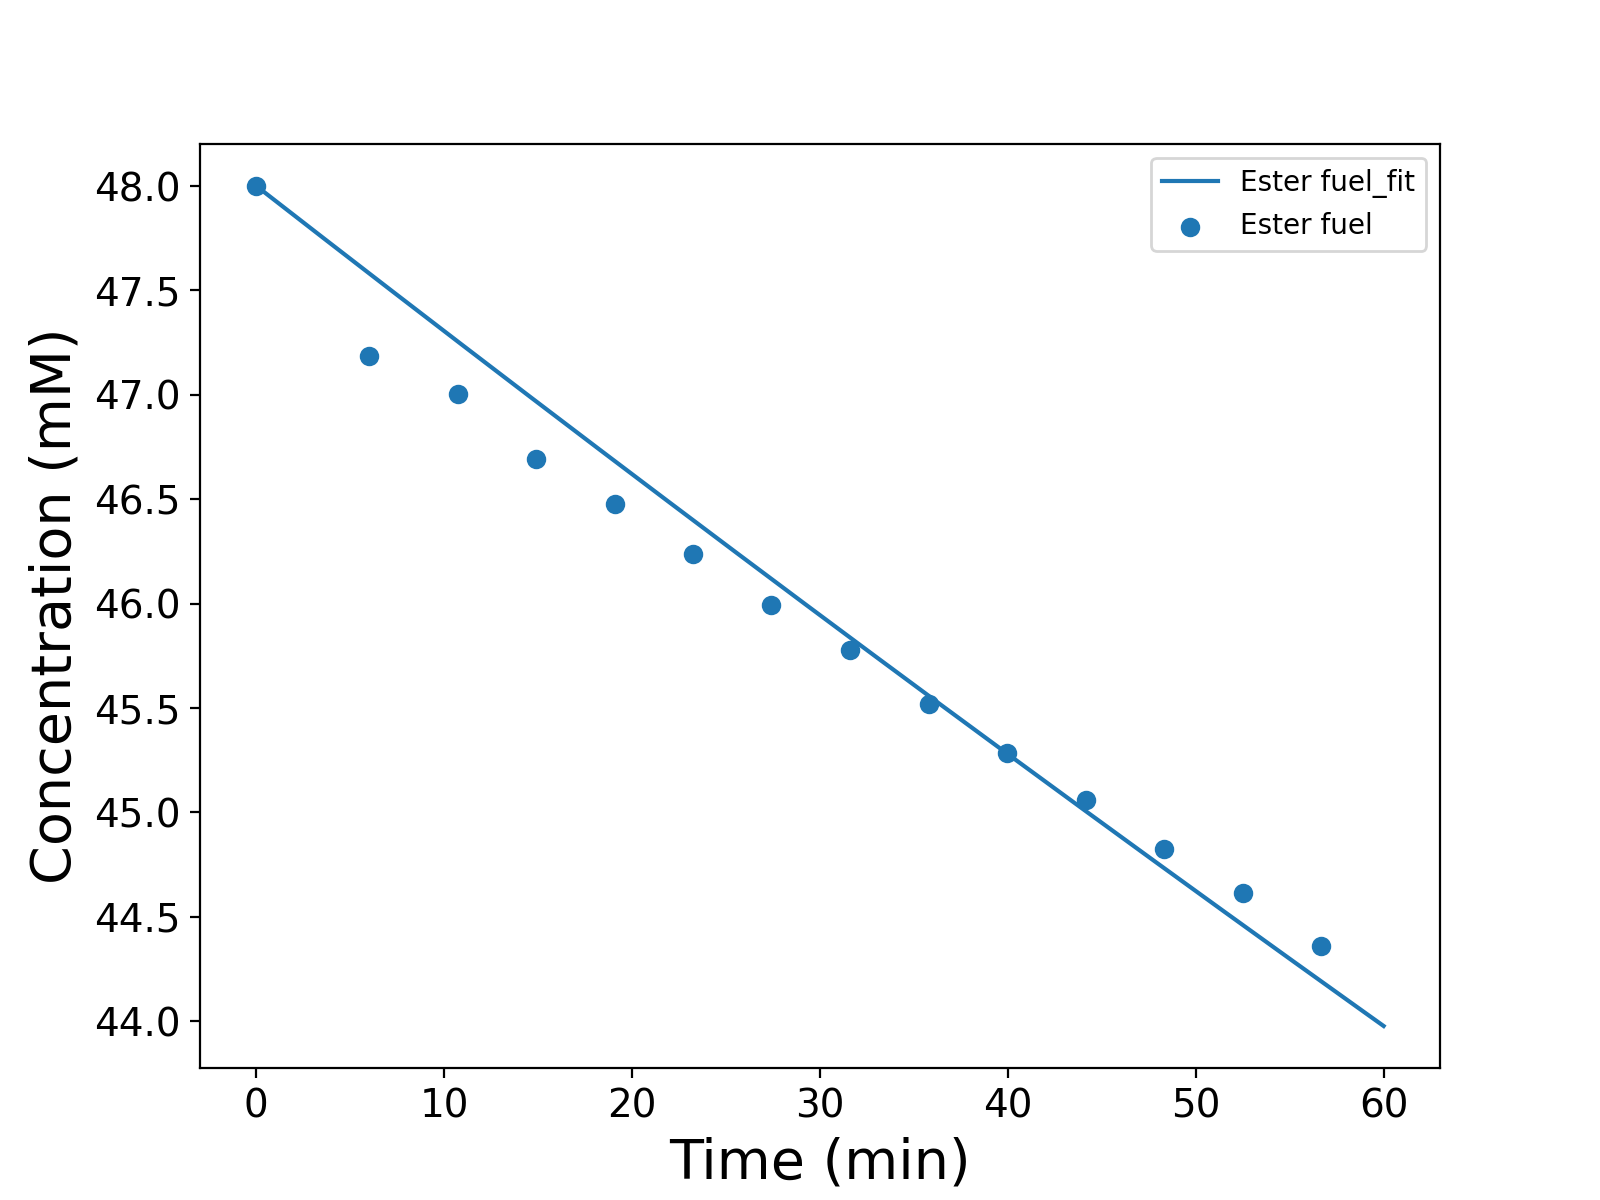

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from symfit import parameters, variables, Fit, D, ODEModel

%matplotlib nbagg

"""
Fitting to SA02-211-1 (0.6 mM) based on concentration. The concentration was calculated WITHOUT an external standard.
k1 is the pseudo-first order rate constant for the hydrolysis of the ester fuel. 
"""

t, fuel = variables('t, fuel')
k1, k2 = parameters('k1, k2')
k1.value = 0.007

t_data = np.array(reaction_data.Time, dtype=np.float64)
fuel_data = np.array(reaction_data.Fuel, dtype=np.float64)

t0 = 0.0
fuel0 = 48.0

model_dict = {
    D(fuel, t): -k1*fuel
}

ode_model = ODEModel(model_dict, initial={t: t0, fuel: fuel0})
print(ode_model)
fit = Fit(ode_model, t=t_data, fuel=fuel_data)
fit_result = fit.execute()
print(fit_result)

tvec = np.linspace(0.0, 60.0, 10000)
fuel, = ode_model(t=tvec, **fit_result.params)

fig, ax = plt.subplots(1,1, figsize=(8,6))

ax.plot(tvec, fuel, label='Ester fuel_fit')
ax.scatter(t_data, fuel_data, label='Ester fuel')

ax.set_xlabel('Time (min)', fontsize=20, fontweight='normal')
ax.set_ylabel('Concentration (mM)', fontsize=20, fontweight='normal')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.legend(loc='best')
plt.show()

In [4]:
import pandas as pd
import numpy as np

reaction_data = pd.read_csv('02-211-2.csv', sep=',')
reaction_data.head()

,Unnamed: 0,Time (min),Unnamed: 2,Ester fuel,Unnamed: 4,Phenol waste,Unnamed: 6
0,-360,0.000000,1.0,48.000000,0.000,0.000000,--
1,0,6.000000,79029.4,47.337285,1106.400,0.662715,NaN
2,272,10.533333,39407.7,47.190101,676.334,0.809899,NaN
3,523,14.716667,39139.4,47.040562,798.286,0.959438,NaN
4,774,18.900000,38947.8,46.846848,958.714,1.153152,NaN


In [5]:
reaction_data.rename(columns={"Time (min)":"Time", "Ester fuel":"Fuel", "Phenol waste":"Waste", "Ester fuel (old way)":"Fuel_old", "Byproducts (old way)":"Byproduct_old", "Phenol waste (old way)":"Waste_old"}, inplace=True)
reaction_data.head()

,Unnamed: 0,Time,Unnamed: 2,Fuel,Unnamed: 4,Waste,Unnamed: 6
0,-360,0.000000,1.0,48.000000,0.000,0.000000,--
1,0,6.000000,79029.4,47.337285,1106.400,0.662715,NaN
2,272,10.533333,39407.7,47.190101,676.334,0.809899,NaN
3,523,14.716667,39139.4,47.040562,798.286,0.959438,NaN
4,774,18.900000,38947.8,46.846848,958.714,1.153152,NaN


Derivative(fuel, t; k1) = -k1*fuel

Parameter Value        Standard Deviation
k1        1.100243e-03 2.710807e-05
Status message         Desired error not necessarily achieved due to precision loss.
Number of iterations   6
Objective              <symfit.core.objectives.LeastSquares object at 0x7fd9448f2ee0>
Minimizer              <symfit.core.minimizers.BFGS object at 0x7fd9448f2b80>

Goodness of fit qualifiers:
chi_squared            0.3231753176776493
objective_value        0.16158765883882464
r_squared              0.9611463958977032


<IPython.core.display.Javascript object>


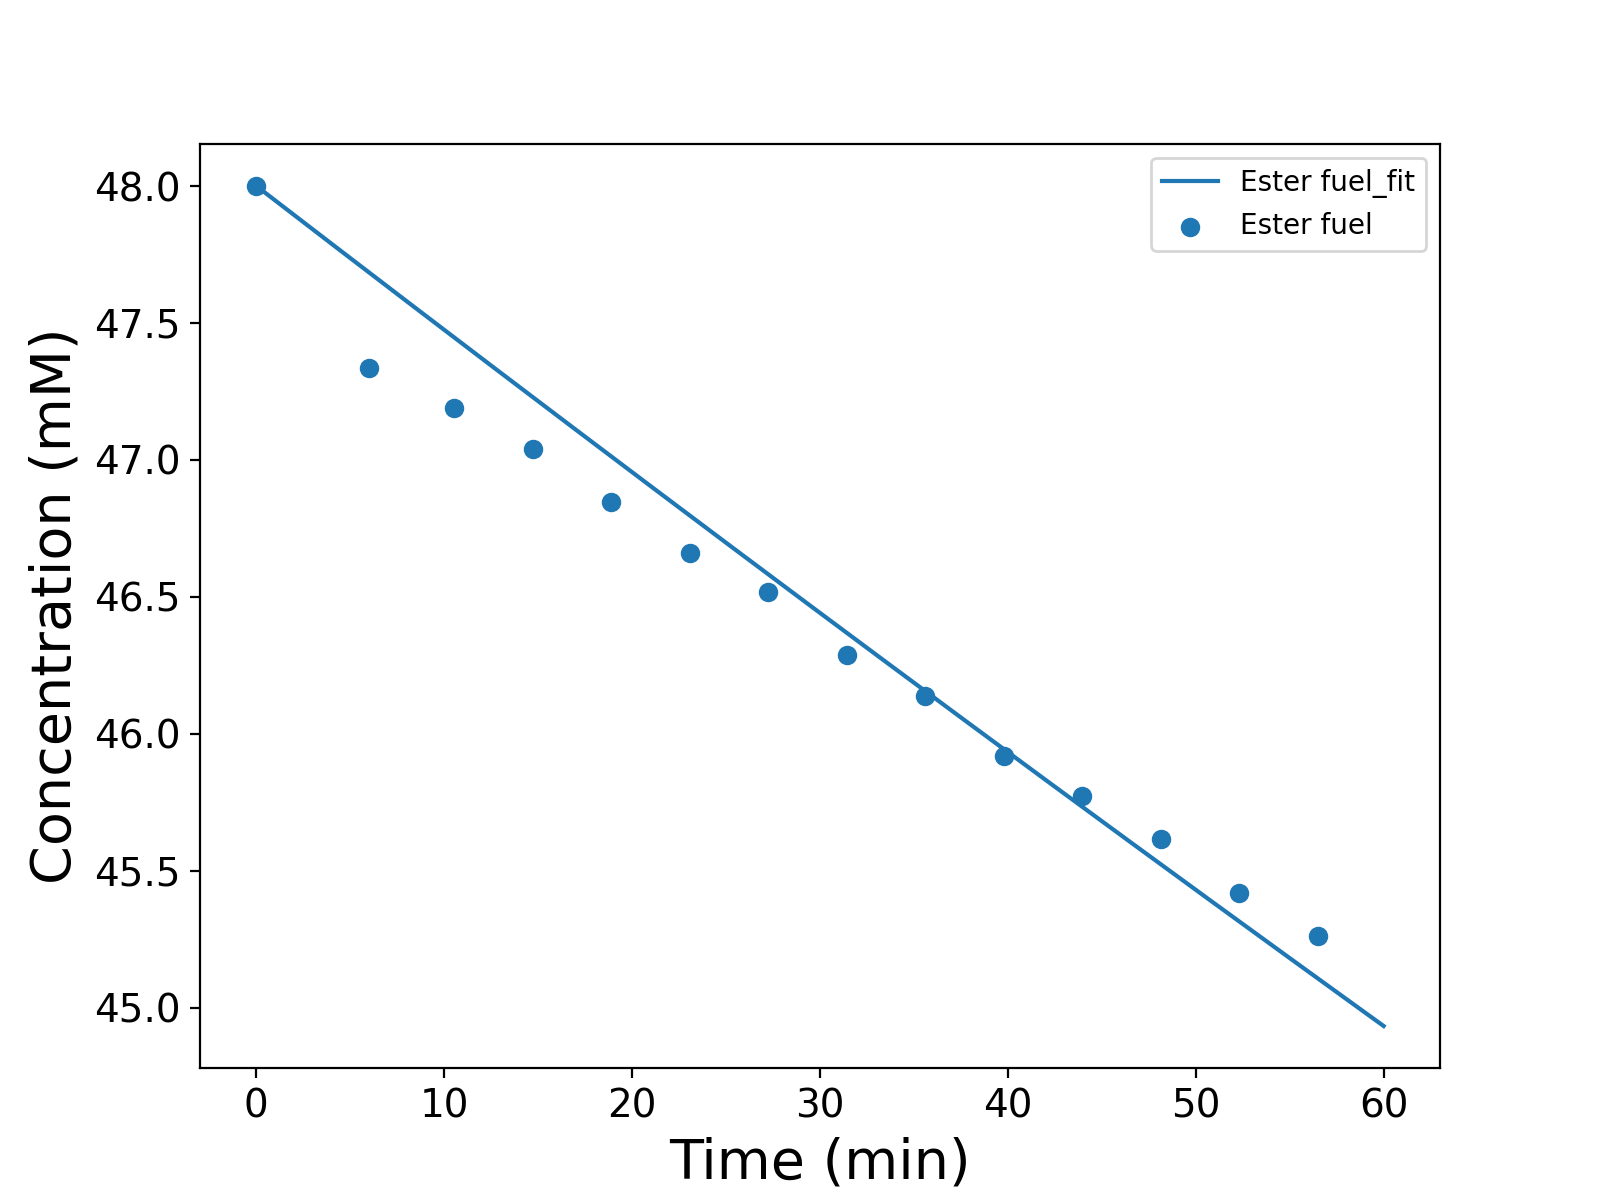

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from symfit import parameters, variables, Fit, D, ODEModel

%matplotlib nbagg

"""
Fitting to SA02-211-2 (0.2 mM) based on concentration. The concentration was calculated WITHOUT an external standard.
k1 is the pseudo-first order rate constant for the hydrolysis of the ester fuel. 
"""

t, fuel = variables('t, fuel')
k1, k2 = parameters('k1, k2')
k1.value = 0.007

t_data = np.array(reaction_data.Time, dtype=np.float64)
fuel_data = np.array(reaction_data.Fuel, dtype=np.float64)

t0 = 0.0
fuel0 = 48.0

model_dict = {
    D(fuel, t): -k1*fuel
}

ode_model = ODEModel(model_dict, initial={t: t0, fuel: fuel0})
print(ode_model)
fit = Fit(ode_model, t=t_data, fuel=fuel_data)
fit_result = fit.execute()
print(fit_result)

tvec = np.linspace(0.0, 60.0, 10000)
fuel, = ode_model(t=tvec, **fit_result.params)

fig, ax = plt.subplots(1,1, figsize=(8,6))

ax.plot(tvec, fuel, label='Ester fuel_fit')
ax.scatter(t_data, fuel_data, label='Ester fuel')

ax.set_xlabel('Time (min)', fontsize=20, fontweight='normal')
ax.set_ylabel('Concentration (mM)', fontsize=20, fontweight='normal')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.legend(loc='best')
plt.show()

In [7]:
import pandas as pd
import numpy as np

reaction_data = pd.read_csv('02-211-3.csv', sep=',')
reaction_data.head()

,Unnamed: 0,Time (min),Unnamed: 2,Ester fuel,Unnamed: 4,Phenol waste,Unnamed: 6
0,-420,0.000000,1.0,48.000000,0.000,0.000000,--
1,0,7.000000,74762.6,47.362335,1006.570,0.637665,NaN
2,278,11.633333,40140.5,47.228904,655.365,0.771096,NaN
3,528,15.800000,39923.8,47.092588,769.279,0.907412,NaN
4,779,19.983333,39843.4,46.842596,984.465,1.157404,NaN


In [8]:
reaction_data.rename(columns={"Time (min)":"Time", "Ester fuel":"Fuel", "Phenol waste":"Waste", "Ester fuel (old way)":"Fuel_old", "Byproducts (old way)":"Byproduct_old", "Phenol waste (old way)":"Waste_old"}, inplace=True)
reaction_data.head()

,Unnamed: 0,Time,Unnamed: 2,Fuel,Unnamed: 4,Waste,Unnamed: 6
0,-420,0.000000,1.0,48.000000,0.000,0.000000,--
1,0,7.000000,74762.6,47.362335,1006.570,0.637665,NaN
2,278,11.633333,40140.5,47.228904,655.365,0.771096,NaN
3,528,15.800000,39923.8,47.092588,769.279,0.907412,NaN
4,779,19.983333,39843.4,46.842596,984.465,1.157404,NaN


Derivative(fuel, t; k1) = -k1*fuel

Parameter Value        Standard Deviation
k1        9.676398e-04 2.553919e-05
Status message         Desired error not necessarily achieved due to precision loss.
Number of iterations   6
Objective              <symfit.core.objectives.LeastSquares object at 0x7fd94417b310>
Minimizer              <symfit.core.minimizers.BFGS object at 0x7fd94417b220>

Goodness of fit qualifiers:
chi_squared            0.30336378289688315
objective_value        0.15168189144844157
r_squared              0.9530347644324991


<IPython.core.display.Javascript object>


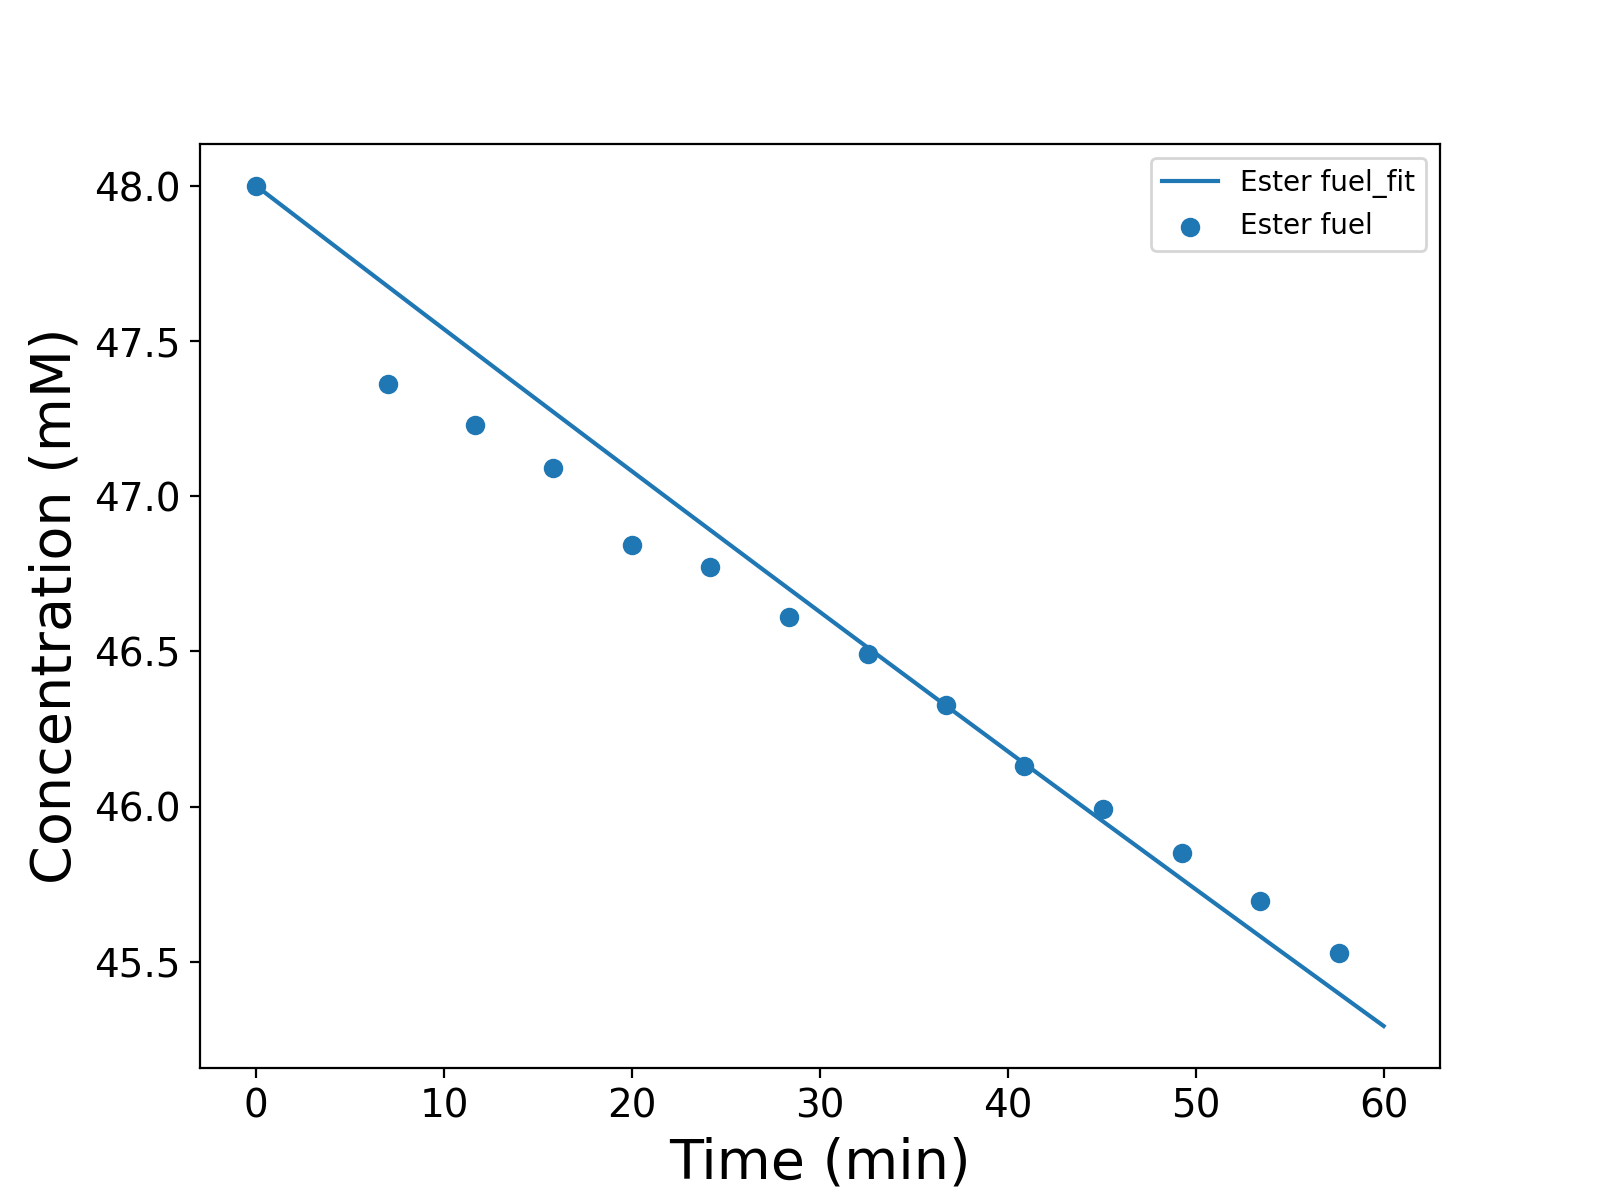

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from symfit import parameters, variables, Fit, D, ODEModel

%matplotlib nbagg

"""
Fitting to SA02-211-3 (0.06 mM) based on concentration. The concentration was calculated WITHOUT an external standard.
k1 is the pseudo-first order rate constant for the hydrolysis of the ester fuel. 
"""

t, fuel = variables('t, fuel')
k1, k2 = parameters('k1, k2')
k1.value = 0.007

t_data = np.array(reaction_data.Time, dtype=np.float64)
fuel_data = np.array(reaction_data.Fuel, dtype=np.float64)

t0 = 0.0
fuel0 = 48.0

model_dict = {
    D(fuel, t): -k1*fuel
}

ode_model = ODEModel(model_dict, initial={t: t0, fuel: fuel0})
print(ode_model)
fit = Fit(ode_model, t=t_data, fuel=fuel_data)
fit_result = fit.execute()
print(fit_result)

tvec = np.linspace(0.0, 60.0, 10000)
fuel, = ode_model(t=tvec, **fit_result.params)

fig, ax = plt.subplots(1,1, figsize=(8,6))

ax.plot(tvec, fuel, label='Ester fuel_fit')
ax.scatter(t_data, fuel_data, label='Ester fuel')

ax.set_xlabel('Time (min)', fontsize=20, fontweight='normal')
ax.set_ylabel('Concentration (mM)', fontsize=20, fontweight='normal')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.legend(loc='best')
plt.show()

In [10]:
import pandas as pd
import numpy as np

reaction_data = pd.read_csv('02-218-4 60 min.csv', sep=',')
reaction_data.head()

,Unnamed: 0,Time (min),Unnamed: 2,Ester fuel,Unnamed: 4,Phenol waste,Unnamed: 6
0,-420,0.000000,1.0,48.000000,0.000,0.000000,--
1,0,7.000000,78169.7,47.287342,1178.080,0.712658,NaN
2,289,11.816667,39220.4,47.197126,667.181,0.802874,NaN
3,540,16.000000,39056.9,47.039062,797.874,0.960938,NaN
4,790,20.166667,38905.9,46.924089,892.064,1.075911,NaN


In [11]:
reaction_data.rename(columns={"Time (min)":"Time", "Ester fuel":"Fuel", "Phenol waste":"Waste", "Ester fuel (old way)":"Fuel_old", "Byproducts (old way)":"Byproduct_old", "Phenol waste (old way)":"Waste_old"}, inplace=True)
reaction_data.head()

,Unnamed: 0,Time,Unnamed: 2,Fuel,Unnamed: 4,Waste,Unnamed: 6
0,-420,0.000000,1.0,48.000000,0.000,0.000000,--
1,0,7.000000,78169.7,47.287342,1178.080,0.712658,NaN
2,289,11.816667,39220.4,47.197126,667.181,0.802874,NaN
3,540,16.000000,39056.9,47.039062,797.874,0.960938,NaN
4,790,20.166667,38905.9,46.924089,892.064,1.075911,NaN


Derivative(fuel, t; k1) = -k1*fuel

Parameter Value        Standard Deviation
k1        9.707286e-04 2.889682e-05
Status message         Desired error not necessarily achieved due to precision loss.
Number of iterations   5
Objective              <symfit.core.objectives.LeastSquares object at 0x7fd920020d90>
Minimizer              <symfit.core.minimizers.BFGS object at 0x7fd920020c10>

Goodness of fit qualifiers:
chi_squared            0.38236218309015957
objective_value        0.19118109154507978
r_squared              0.9394853145136467


<IPython.core.display.Javascript object>


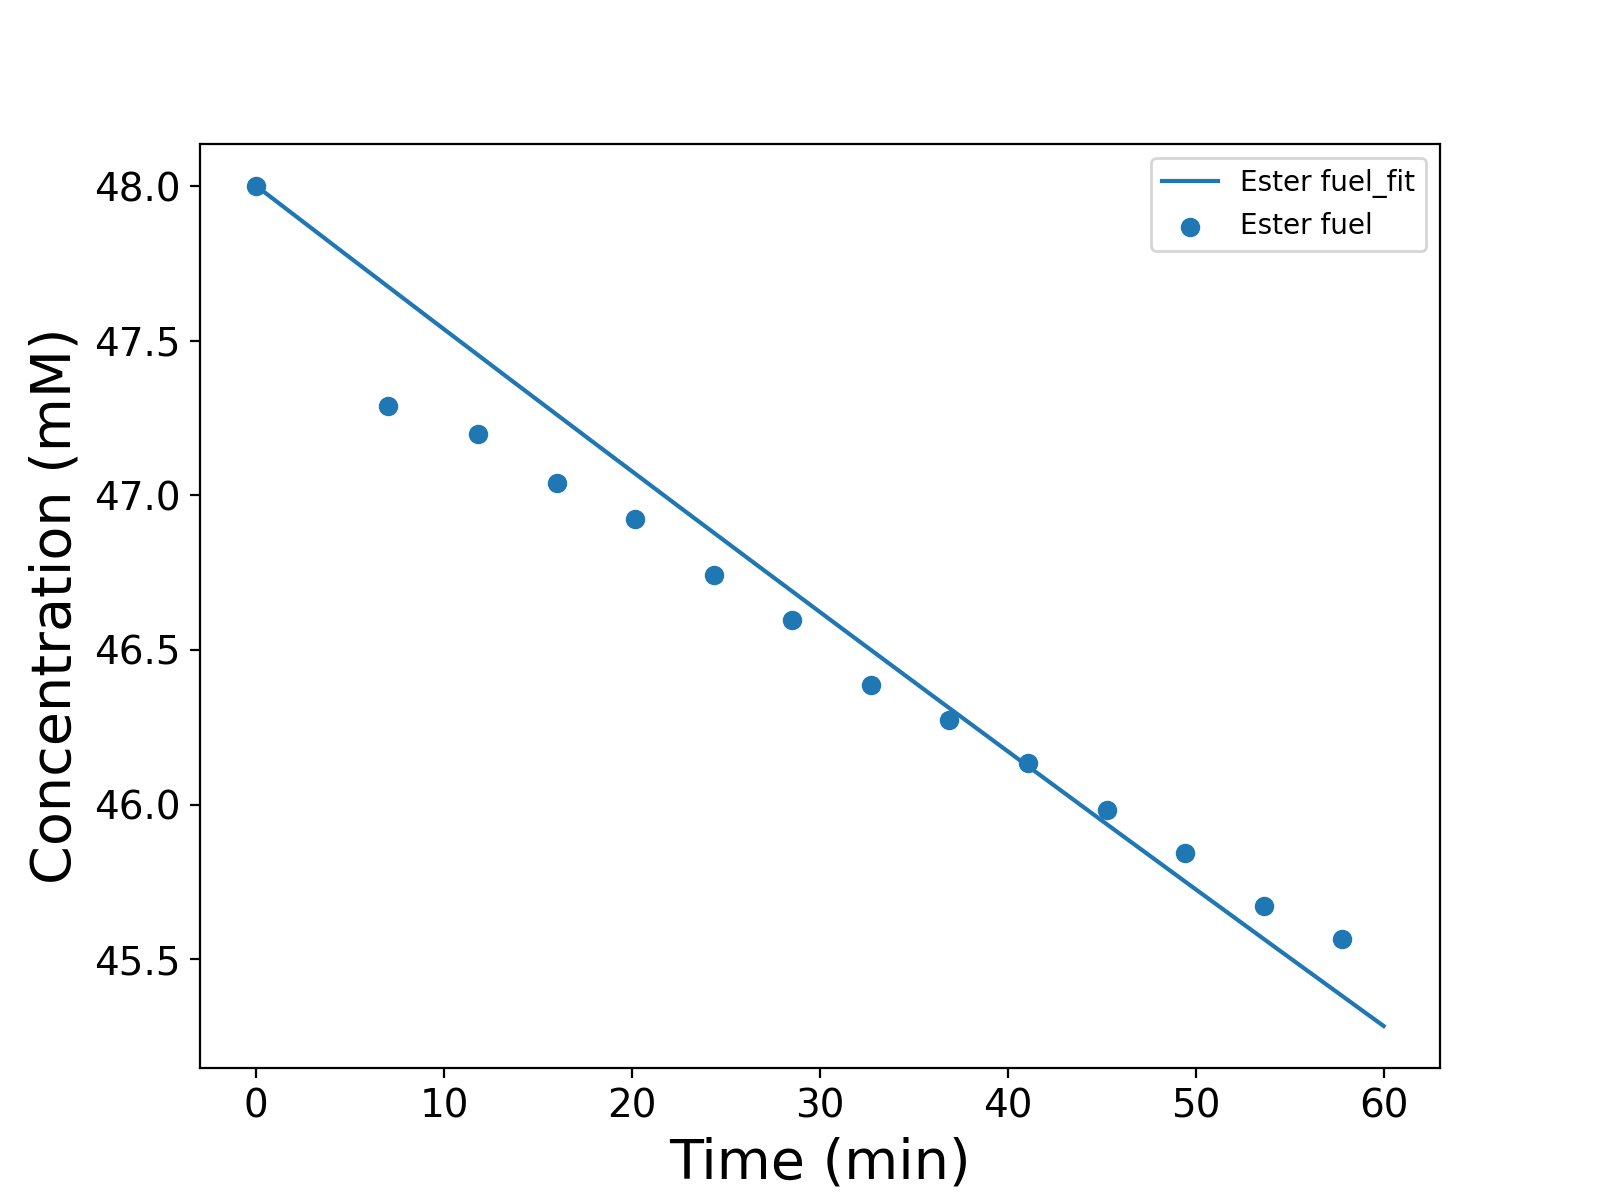

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from symfit import parameters, variables, Fit, D, ODEModel

%matplotlib nbagg

"""
Fitting to SA02-218-4 (0 mM) based on concentration. The concentration was calculated WITHOUT an external standard.
k1 is the pseudo-first order rate constant for the hydrolysis of the ester fuel. 
"""

t, fuel = variables('t, fuel')
k1, k2 = parameters('k1, k2')
k1.value = 0.007

t_data = np.array(reaction_data.Time, dtype=np.float64)
fuel_data = np.array(reaction_data.Fuel, dtype=np.float64)

t0 = 0.0
fuel0 = 48.0

model_dict = {
    D(fuel, t): -k1*fuel
}

ode_model = ODEModel(model_dict, initial={t: t0, fuel: fuel0})
print(ode_model)
fit = Fit(ode_model, t=t_data, fuel=fuel_data)
fit_result = fit.execute()
print(fit_result)

tvec = np.linspace(0.0, 60.0, 10000)
fuel, = ode_model(t=tvec, **fit_result.params)

fig, ax = plt.subplots(1,1, figsize=(8,6))

ax.plot(tvec, fuel, label='Ester fuel_fit')
ax.scatter(t_data, fuel_data, label='Ester fuel')

ax.set_xlabel('Time (min)', fontsize=20, fontweight='normal')
ax.set_ylabel('Concentration (mM)', fontsize=20, fontweight='normal')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.legend(loc='best')
plt.show()